## Kvanttilaskenta 2021, kierros 6 laskuharjoitukset

1) Tutustu viime vuoden luentoon Bernstein-Vazirani-algoritmista:
<a href="https://youtu.be/AeiPfR0M4HA?t=49" target="_blank">Bernstein-Vazirani-algoritmi </a>

<a href ="https://drive.google.com/file/d/1G9i_xUAHjCFhiSz4pom6rYEhWVtN_ZAv/view?usp=sharing" target="_blank">Youtube-videon kalvot suomeksi</a>

Kierroksella 6 on vain yksi tehtävä, tehtävässä 1 tarvittava koodi (myös alla):

<a href = "https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb"> IBM:n mallikoodi.</a>



### Tehtävä 1

Tehtävässä 3 rakennetaan tutoriaalin avulla kvanttipiiri, joka ratkaisee binaarimuotoisen salasanan yhdellä yrityksellä. Salasana koostuu vain 0:sta ja 1:stä, salasanan pituus voi vaihdella. Annettuna on funktio eli musta laatikko, joka käyttäytyy sovitulla tavalla salasanan perusteella. Funktio käyttäytyy siten, että se vertailee salasanan jokaista bittiä ja syötteen jokaista bittiä. Funktio laskee AND-operaation salasanan $s$ ja syötteen $x$ jokaisen bitin välillä.   

$$
\begin{array}{r|cccccc}
s & 0 & 1 & 1 & 0 & 1 & 0 \\
x & 0 & 0 & 1 & 1 & 1 & 0 \\ 
\hline
\mathit{AND}  &0&0&1&0&1&0
\end{array}
$$

Funktio palauttaa 0 jos tuloksena oli parillinen määrä ykkösbittejä, muuten funktio palauttaa 1. Toisin sanoen, funktio kertoo, kuinka monta kertaa salasanassa ja syötteessä on 1 bitti samassa kohdassa ja palauttaa tiedon onko näitä kohtia pariton vai parillinen määrä. Taulukon esimerkissä funktio palauttaisi arvon 0.

Tässä termi "musta laatikko" ei tarkoita, ettemme tietäisi piirin toteutusta, päinvastoin: piirin jokainen portti on oltava tiedossa, jotta se voidaan suorittaa kvanttitietokonella. Tämä herättää kysymyksen, mitä hyötyä salasanan ratkaisemisesta on. Bernsteinin-Vaziranin algoritmi ei olekaan käytännössä kovin hyödyllinen, koska se rajaa mustan laatikon, eli funktion toiminnan todella tarkasti. Monimutkaisemmissa algoritmeissa funktio voidaan kuitenkin helposti määrittää tavalla, jolla emme pysty helposti ennustamaan sen käyttäytymistä, esimerkiksi matemaattisten laskutoimitusten avulla.

### Klassinen tausta: 
Jos salasana koostuu 6 bitistä, kuten esimerkkiksi 101001, niin klassisella tietkoneella tarvitaan salasanan selvittämiseen 6 kappaletta funktion kutsuja. Jos salasanan bittien määrä $n$ kasvaa, niin klassinen tietokone tarvitsee salasanan selvittämiseen $n$ kappaletta funktion kutsuja. Salasana saadaan selville testaamalla jokaista bittiä erikseen:

$$
f(100000)=1 \\
f(010000)=0 \\
f(001000)=1 \\
f(000100)=0 \\
f(000010)=0 \\
f(000001)=1
$$

Kvanttitietokoneella salasanan selvittäminen onnistuu siten, että funktio ajaetaan vain kerran. Tätä kutsutaan Bernstein-Vazirani-algoritmiksi.

Jos ehdimme, voimme palata Bernstein-Vaziranin algoritmiin ja pyrkiä näyttämään, miksi se toimii.


### Bernstein-Vazirani-algoritmi

a) Rakenna salasanaa $101101$ vastaava mustan laatikon toteutus ja sitä ympäröivä ratkaisualgoritmi:



Alla koodiesimerkki mustan laatikon $U_f$ toteutuksesta. Huomaa järjestys, jos salasana on $1011$. Tällöin salasanan ensimmäinen bitti vastaa syötekubiteista alimmaista, $x_3$. Salasanan $101101$ kanssa järjestyksellä ei ole kuitenkaan merkitystä.


Jos salasanassa on jossain kohdassa ykkösbitti, on mustan laatikon toteutuksessa CNOT-portti, joka kääntää tuloskubitin, jos syötteen vastaava bitti on yksi. Jos tuloskubittia käännetään parillinen määrä kertoja, ei piiri tee (tälle superposition osalle) mitään.

Voit tarvittaessa hyödyntää myös ohjevideota:5

<a href="https://youtu.be/sqJIpHYl7oo?t=241" target="_blank">Bernstein-Vazirani-algorimin tutoriaali</a>

b) Simuloi kvanttipiirin toiminta, salasanan tulisi selvitä yhdellä algoritmin toistokerralla. Ohjeet tutoriaalissa.

c) VAPAAEHTOINEN LISÄTEHTÄVÄ: Tee tutoriaalin loppuosassa oleva yleisempi algoritmi, jolla voit ratkaista $n$:stä bitistä koostuvan salasanan yhdellä yrityksellä. Tarkista piirin toiminta simuloimalla piiri.laskennallisesti


## Klassinen algoritmi

Testaa alla olevalla klassisella algoritmilla, kuinka monta kertaa joudut kutsumaan funktion  selvittääksesi salasanan (secretnumber)?

Anna 6 bittinen luku: 100000


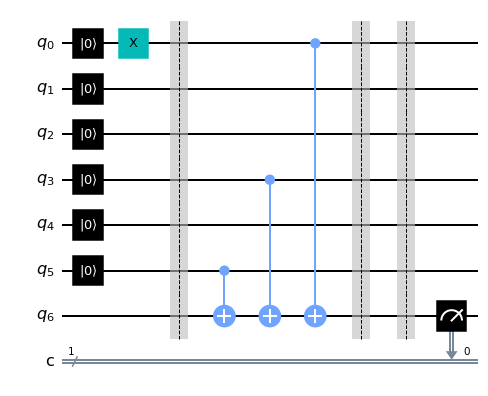

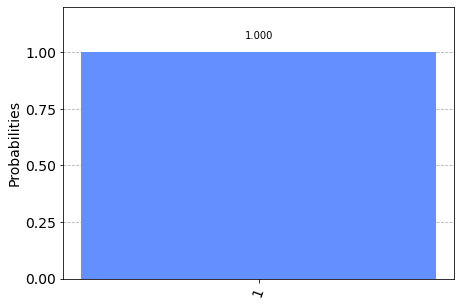

In [16]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber='1011'

i = input("Anna 6 bittinen luku: ")

circuit = QuantumCircuit(6+1,1)
circuit.initialize(int(i, 2), range(6)[::-1])
circuit = circuit.decompose()
#circuit.h([0,1,2,3,4,5])
circuit.barrier()

#piilotettu oraakkeli
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()
#circuit.h([0,1,2,3,4,5])

circuit.barrier()
#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(6, 0)
display(circuit.draw(output='mpl'))

counts = Aer.get_backend('aer_simulator').run(circuit).result().get_counts()

plot_histogram(counts)

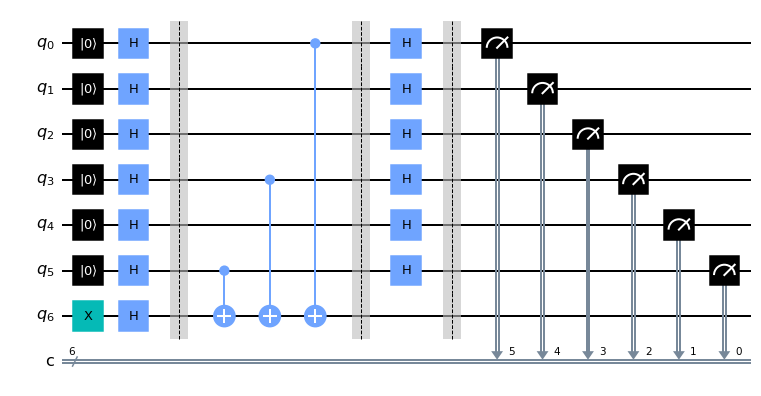

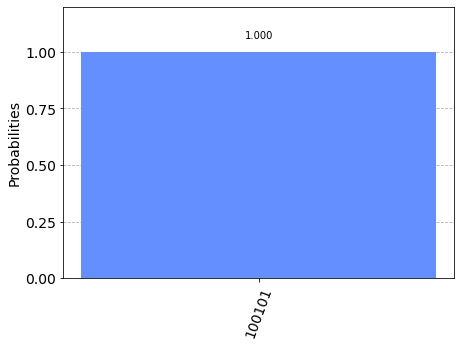

In [24]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
secretnumber='1011'

#i = input("Anna 6 bittinen luku: ")
i = "000000"
circuit = QuantumCircuit(6+1,6)
circuit.initialize(int(i, 2), range(6)[::-1])
circuit = circuit.decompose()
circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)
circuit.barrier()

# piilotettu oraakkeli
circuit.cx(5,6)
circuit.cx(3,6)
circuit.cx(0,6)

circuit.barrier()
circuit.h([0,1,2,3,4,5])

circuit.barrier()
circuit.measure(range(6),range(5,-1,-1))
#circuit.measure(6, 0)
display(circuit.draw(output='mpl'))

counts = Aer.get_backend('aer_simulator').run(circuit).result().get_counts()

plot_histogram(counts)

### Berzstein - Vazirani algoritmin havainnollistava kaavio

![bervaz](images/bervaz.jpg)
